---

# The Single Neuron Model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamilyaSultan/RICE_INDE-577/blob/main/Supervised%20Learning/The%20Perceptron/The_Perceptron-Penguins.ipynb)

## The Perceptron 

In this notebook I would implement and train the Perceptron Neuron Model on the Palmer Penguins dataset.


The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="Single-Perceptron.png" width="500">
</p>
https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/

---

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

df = pd.read_csv("palmer_penguins.csv") 
print(f"{df = } \n")

df =      Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0             0  Adelie  Torgersen            39.1           18.7   
1             1  Adelie  Torgersen            39.5           17.4   
2             2  Adelie  Torgersen            40.3           18.0   
3             3  Adelie  Torgersen             NaN            NaN   
4             4  Adelie  Torgersen            36.7           19.3   
..          ...     ...        ...             ...            ...   
339         339  Gentoo     Biscoe             NaN            NaN   
340         340  Gentoo     Biscoe            46.8           14.3   
341         341  Gentoo     Biscoe            50.4           15.7   
342         342  Gentoo     Biscoe            45.2           14.8   
343         343  Gentoo     Biscoe            49.9           16.1   

     flipper_length_mm  body_mass_g     sex  
0                181.0       3750.0    Male  
1                186.0       3800.0  Female  
2                195.0      

---

Load the data and explore it. There are NAN values. I would drop them using

```python
df.dropna(inplace = True)
```

---

In [3]:
df.dropna(inplace = True)
print(f"{df = } \n")

df =      Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0             0  Adelie  Torgersen            39.1           18.7   
1             1  Adelie  Torgersen            39.5           17.4   
2             2  Adelie  Torgersen            40.3           18.0   
4             4  Adelie  Torgersen            36.7           19.3   
5             5  Adelie  Torgersen            39.3           20.6   
..          ...     ...        ...             ...            ...   
338         338  Gentoo     Biscoe            47.2           13.7   
340         340  Gentoo     Biscoe            46.8           14.3   
341         341  Gentoo     Biscoe            50.4           15.7   
342         342  Gentoo     Biscoe            45.2           14.8   
343         343  Gentoo     Biscoe            49.9           16.1   

     flipper_length_mm  body_mass_g     sex  
0                181.0       3750.0    Male  
1                186.0       3800.0  Female  
2                195.0      

In [8]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

---
The Perceptron is used on binary classification problems. Thus, we need to choose two of the three species of palmer penguins to implement and train the perceptron on. First I would try "Adelie" and "Chinstrap" penguin species. The data for these two species are contained in the first 219 rows of data in ```df```. 
```


In order to choose the features of interest I want to look at the data for Adelie species, which is first 151 rows. and compare it with the Chinstrap species, the next rows until 219.

In [13]:
df.iloc[:152].describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,152.000000,151.000000,151.000000,151.000000,151.000000
mean,75.500000,38.791391,18.346358,189.953642,3700.662252
std,44.022721,2.663405,1.216650,6.539457,458.566126
min,0.000000,32.100000,15.500000,172.000000,2850.000000
25%,37.750000,36.750000,17.500000,186.000000,3350.000000
50%,75.500000,38.800000,18.400000,190.000000,3700.000000
75%,113.250000,40.750000,19.000000,195.000000,4000.000000
max,151.000000,46.000000,21.500000,210.000000,4775.000000


In [14]:
df.iloc[152:220].describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.00000,68.000000,68.000000,68.000000,68.000000
mean,185.50000,48.833824,18.420588,195.823529,3733.088235
std,19.77372,3.339256,1.135395,7.131894,384.335081
min,152.00000,40.900000,16.400000,178.000000,2700.000000
25%,168.75000,46.350000,17.500000,191.000000,3487.500000
50%,185.50000,49.550000,18.450000,196.000000,3700.000000
75%,202.25000,51.075000,19.400000,201.000000,3950.000000
max,219.00000,58.000000,20.800000,212.000000,4800.000000


From visual inspection I would think that ```bill_length_mm``` and ```flipper_length_mm```would be features to differentiate between these two penguin species. 
So in the next step I would convert the the string names associated with each specicies to numerial values, so "Adelie" is going to be -1 and Chinstrap is going to be 1.

In [15]:
# Store the desired species values in the numpy array y
y = df.iloc[0:220].species.values
# Convert each entry of y with Adelie to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "flipper_length_mm"]].iloc[:220].values

I am going to use the class Perceptron(object) provided in class and explore the result, vary the parameters such as number of epochs and the eta values.



In [16]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        


Next we can instantiate an instance of the ```Perceptron``` class and also train this instance over 1000 epochs. 


In [17]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X```.

---

In [18]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

Clearly, the features used to predict the species did not help the Perceptron to predict the correct label. Let's try different features now. ```bill_length_mm``` and ```bill_depth_mm```.

In [62]:
y = df.iloc[0:220].species.values
# Convert each entry of y with Adelie to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "flipper_length_mm"]].iloc[:220].values

In [63]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [64]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

The result is still not satisfying. Maybe I should try choosing different specicies: Adelie and Gentoo, since Gentoo have more data than the Chinstap.

In [55]:
df.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Filtering out the Adelie and Gentoo into a new dataframe ```dfn```.

In [66]:
filt = (df['species'] == 'Adelie') | (df['species'] == 'Gentoo')

In [67]:
dfn = df.loc[filt, ['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']]


In [68]:
y = dfn.iloc[0:277].species.values
y = np.where(y == 'Adelie', -1, 1)
X = dfn[["bill_length_mm", "flipper_length_mm"]].iloc[:277].values

In [84]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [85]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

The result has not improved. Probably the data is not linearly differentiable. Let's plot the data and look at it. It would have been more efficient if I have done it from the very beginning :)

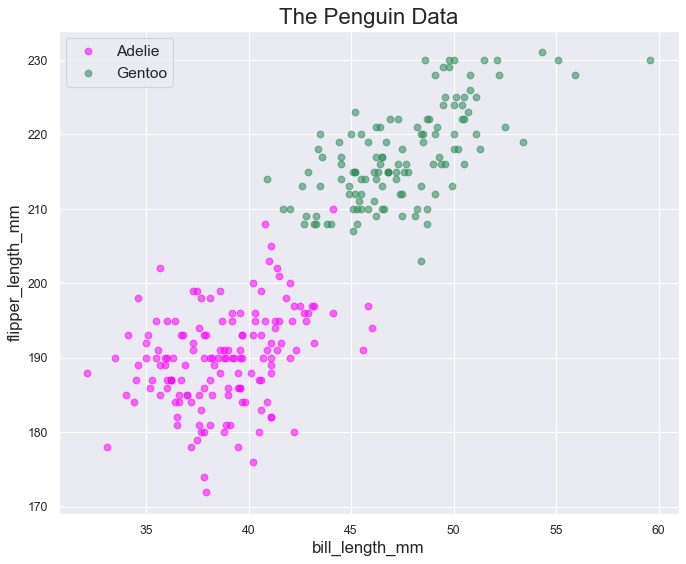

In [74]:
import seaborn as sns 
sns.set_theme()  

plt.figure(figsize = (10, 8), dpi = 80)

# Grab unique values in the species column
species_list = list(set(dfn.species))

for color, species in zip(["magenta", "seagreen"], ['Adelie', 'Gentoo']):
    temp_dfn = dfn[dfn.species == species] # Make a DataFrame for a specific species 
    plt.scatter(temp_dfn.bill_length_mm,
                temp_dfn.flipper_length_mm,
                c = color, # Marker color
                alpha = .56, # Marker intensity 
                label = species # Marker label
                )

plt.xlabel("bill_length_mm", fontsize  = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.title("The Penguin Data", fontsize = 20)

plt.legend(fontsize = 14)
plt.show()


So the graph above actually demostrates that the data is very linearly separable. 

In [80]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [81]:
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

ValueError: Filled contours require at least 2 levels.

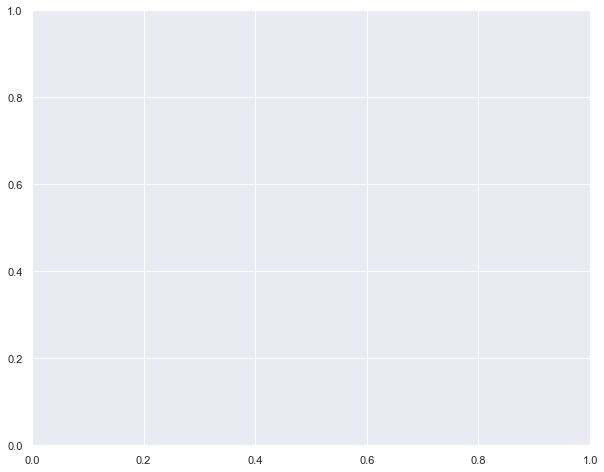

In [86]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("The Penguin Perceptron", fontsize = 18)
plt.xlabel("bill length mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.show()

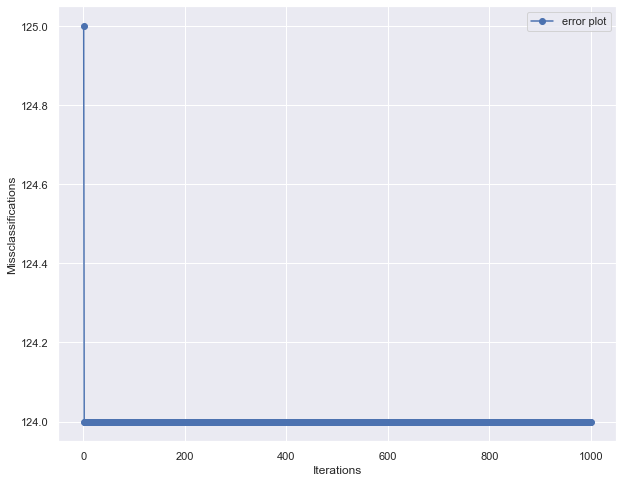

In [87]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

---

# Conclusion 

It it clear that something is not performing well in this dataset of Palmer penguins. I am surprised even though after plotting the two features of interest of two species of penguins it is very evident that the species are linearly separable. 
In the next section I would implement the linear regression on one species one feature and set the other feature of the same species as a target.

---